In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['TangibilityCondition','Impact']]
require =[['Sympathy','TangibilityCondition']]
tempForbid = p.ForbiddenWithin(['TangibilityCondition','Imaginability'])
temporal = [tempForbid,['Sympathy','AmountDonated'],['Impact']]
prior = p.knowledge(forbiddirect = forbid, requiredirect = require, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

0* Imaginability TangibilityCondition 
1 AmountDonated Sympathy 
2 Impact 

forbiddirect

TangibilityCondition ==> Impact 
requiredirect

Sympathy ==> TangibilityCondition 

#### Load causal algorithms from the py-causal library and Run Bootstrapping FGES Continuous

In [5]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'fges', scoreId = 'fisher-z')

alpha: Cutoff for p values (alpha) (min = 0.0) (java.lang.Double) [default:0.01]
faithfulnessAssumed: Yes if (one edge) faithfulness should be assumed (java.lang.Boolean) [default:true]
symmetricFirstStep: Yes if the first step step for FGES should do scoring for both X->Y and Y->X (java.lang.Boolean) [default:false]
maxDegree: The maximum degree of the graph (min = -1) (java.lang.Integer) [default:100]
verbose: Yes if verbose output should be printed or logged (java.lang.Boolean) [default:false]
bootstrapSampleSize: The number of bootstraps (min = 0) (java.lang.Integer) [default:0]
bootstrapEnsemble: Ensemble method: Preserved (0), Highest (1), Majority (2) (java.lang.Integer) [default:1]


In [6]:
tetrad.run(algoId = 'fges', dfs = df, scoreId = 'fisher-z', priorKnowledge = prior,
           alpha = 0.05, maxDegree = -1, faithfulnessAssumed = True, symmetricFirstStep = True, 
           bootstrapSampleSize = 5, bootstrapEnsemble = 1)

#### Bootstrapping FGES Continuous' Result's Nodes

In [7]:
tetrad.getNodes()

['AmountDonated',
 'Imaginability',
 'Impact',
 'Sympathy',
 'TangibilityCondition']

#### Bootstrapping FGES Continuous' Result's Edges

In [8]:
tetrad.getEdges()

['Sympathy --> AmountDonated [AmountDonated --> Sympathy]:0.4000;[AmountDonated <-- Sympathy]:0.6000;',
 'Sympathy --> Impact [Impact <-- Sympathy]:0.8000;[no edge]:0.2000;',
 'Sympathy --> TangibilityCondition [Sympathy --> TangibilityCondition]:1.0000;',
 'AmountDonated --> Impact [AmountDonated --> Impact]:0.6000;[no edge]:0.4000;',
 'Imaginability --> Sympathy [Imaginability --> Sympathy]:0.6000;[no edge]:0.4000;',
 'Imaginability --> Impact [Imaginability --> Impact]:1.0000;']

#### Plot The Result's Graph

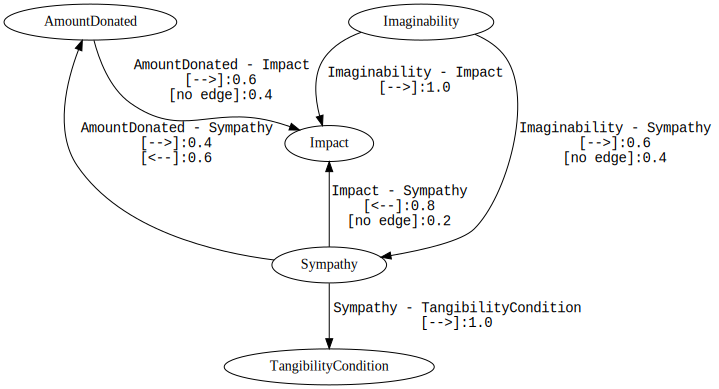

In [9]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

#### Stop Java VM

In [10]:
pc.stop_vm()